Notebook used to train RF models from the training data.

Comments throughout explain where changes can be made to change what's being trained!

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stat
import numpy as np 
#import forestsci
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter

import sys
sys.path.append("..")
import Utility.model_utils as model_utils

In [2]:
# Runtime Variables
number_trees = 100
seed = 72
min_leaf = 1
accuracy_array = []

# Data Input
filename = '../Results/training_data.csv'

# If saving model, set save to True and give meaningful name
model_name = 'RF_C-MC_I-P.sav'
save = True


# Control what features are used by the model
label="Labels"
features=[#'area',
#        'equivalent_diameter', 
#        'orientation', 
#    'major_axis_length',
#    'minor_axis_length',
#    'perimeter',
#        'min_intensity',
#        'mean_intensity',
#        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
#          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
      'moments_hu-3',
      'moments_hu-4',
      'moments_hu-5',
      'moments_hu-6',
    'eccentricity'
         ]


In [3]:
best_f1 = 0
best_model = None
for seed in np.arange(100):
    # Read in data w/ features
    df = pd.read_csv(filename)

    # Modify Data (Remove illegal data OR set different runtime)

    
    # Change how data is grouped
    df['Labels'].replace('Poorly Segmented', 'Incomplete', inplace=True) # Group Poorly Segmented and Incomplete as a single class
    df['Labels'].replace('Multiple Crystal', 'Crystal', inplace=True) # Group Multiple Crystal and Crystal as a single class
    #df['Labels'].replace('Crystal', 'Incomplete', inplace=True)
    #df = df[df['Labels'] != "Incomplete"] # Remove any data labeled as "Incomplete"
    #df = df[df['Labels'] != "Crystal"]
    
    # Missed Labels: Purge any bad data that the model cannot run on
    df['Labels'].replace('', np.nan, inplace=True) 
    df.dropna(subset=['Labels'], inplace=True)
    # Numerical errors (divide by 0)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    for feature in features:
        df.dropna(subset=[feature],inplace=True)

    # Split Data
    X=df[features]
    y=df[label]
    
    print(Counter(y))

    # Encode
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(df[[label]])

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    # Create RandomForestRegressor
    rfr=RandomForestRegressor(n_estimators = number_trees,min_samples_leaf=min_leaf, oob_score=False)
    rfr.fit(X_train,y_train)

    # Accuracy Checks
    y_pred=rfr.predict(X_test)
    y_pred = np.round(y_pred)
    
    accuracy = metrics.f1_score(y_test,y_pred,average='macro')
    accuracy_array.append(accuracy)
    #accuracy = metrics.accuracy_score(y_test,y_pred)
    print(f'{seed} Seed Completed')
    model_utils.success_of_guess(y_pred,y_test,ohe)
    print(f'Running Average F1: {np.average(accuracy_array)}, OOB Score: N/A')
    
    if accuracy > best_f1:
        best_model = rfr
        best_f1 = accuracy

Counter({'Crystal': 754, 'Incomplete': 413})
0 Seed Completed
Labels_Crystal -> Precision = 0.8, Recall = 0.8407643312101911, F1 = 0.8198757763975156
Labels_Incomplete -> Precision = 0.6615384615384615, Recall = 0.5584415584415584, F1 = 0.6056338028169014
Macro F=0.7127547896072085
Run Accuracy : 0.7478632478632479
Running Average F1: 0.7127547896072085, OOB Score: N/A
Counter({'Crystal': 754, 'Incomplete': 413})
1 Seed Completed
Labels_Crystal -> Precision = 0.7828571428571428, Recall = 0.85625, F1 = 0.817910447761194
Labels_Incomplete -> Precision = 0.631578947368421, Recall = 0.4864864864864865, F1 = 0.5496183206106869
Macro F=0.6837643841859404
Run Accuracy : 0.7393162393162394
Running Average F1: 0.6982595868965744, OOB Score: N/A
Counter({'Crystal': 754, 'Incomplete': 413})
2 Seed Completed
Labels_Crystal -> Precision = 0.7619047619047619, Recall = 0.7671232876712328, F1 = 0.764505119453925
Labels_Incomplete -> Precision = 0.6235294117647059, Recall = 0.6022727272727273, F1 = 0.6

22 Seed Completed
Labels_Crystal -> Precision = 0.7439024390243902, Recall = 0.8472222222222222, F1 = 0.7922077922077924
Labels_Incomplete -> Precision = 0.6811594202898551, Recall = 0.5222222222222223, F1 = 0.5911949685534592
Macro F=0.6917013803806258
Run Accuracy : 0.7222222222222222
Running Average F1: 0.6739825616955102, OOB Score: N/A
Counter({'Crystal': 754, 'Incomplete': 413})
23 Seed Completed
Labels_Crystal -> Precision = 0.7515923566878981, Recall = 0.7919463087248322, F1 = 0.7712418300653594
Labels_Incomplete -> Precision = 0.5945945945945946, Recall = 0.5176470588235295, F1 = 0.5534591194968554
Macro F=0.6623504747811074
Run Accuracy : 0.6923076923076923
Running Average F1: 0.67349789140741, OOB Score: N/A
Counter({'Crystal': 754, 'Incomplete': 413})
24 Seed Completed
Labels_Crystal -> Precision = 0.7, Recall = 0.8263888888888888, F1 = 0.7579617834394904
Labels_Incomplete -> Precision = 0.6129032258064516, Recall = 0.4222222222222222, F1 = 0.5
Macro F=0.6289808917197452
Ru

44 Seed Completed
Labels_Crystal -> Precision = 0.7396449704142012, Recall = 0.8223684210526315, F1 = 0.778816199376947
Labels_Incomplete -> Precision = 0.59375, Recall = 0.4634146341463415, F1 = 0.5205479452054794
Macro F=0.6496820722912132
Run Accuracy : 0.6965811965811965
Running Average F1: 0.6677497445989372, OOB Score: N/A
Counter({'Crystal': 754, 'Incomplete': 413})
45 Seed Completed
Labels_Crystal -> Precision = 0.803921568627451, Recall = 0.82, F1 = 0.8118811881188118
Labels_Incomplete -> Precision = 0.6623376623376623, Recall = 0.6071428571428571, F1 = 0.6335403726708074
Macro F=0.7227107803948096
Run Accuracy : 0.7435897435897436
Running Average F1: 0.6689445497249344, OOB Score: N/A
Counter({'Crystal': 754, 'Incomplete': 413})
46 Seed Completed
Labels_Crystal -> Precision = 0.7541899441340782, Recall = 0.8823529411764706, F1 = 0.8132530120481928
Labels_Incomplete -> Precision = 0.6666666666666666, Recall = 0.4444444444444444, F1 = 0.5333333333333333
Macro F=0.67329317269076

66 Seed Completed
Labels_Crystal -> Precision = 0.7908496732026143, Recall = 0.7857142857142857, F1 = 0.7882736156351792
Labels_Incomplete -> Precision = 0.5921052631578947, Recall = 0.5625, F1 = 0.5769230769230769
Macro F=0.6825983462791281
Run Accuracy : 0.7094017094017094
Running Average F1: 0.6688226713343581, OOB Score: N/A
Counter({'Crystal': 754, 'Incomplete': 413})
67 Seed Completed
Labels_Crystal -> Precision = 0.738562091503268, Recall = 0.7793103448275862, F1 = 0.7583892617449666
Labels_Incomplete -> Precision = 0.6, Recall = 0.5393258426966292, F1 = 0.5680473372781064
Macro F=0.6632182995115365
Run Accuracy : 0.688034188034188
Running Average F1: 0.6687402541016696, OOB Score: N/A
Counter({'Crystal': 754, 'Incomplete': 413})
68 Seed Completed
Labels_Crystal -> Precision = 0.8104575163398693, Recall = 0.7948717948717948, F1 = 0.802588996763754
Labels_Incomplete -> Precision = 0.5897435897435898, Recall = 0.5897435897435898, F1 = 0.5897435897435898
Macro F=0.6961662932536719


88 Seed Completed
Labels_Crystal -> Precision = 0.7415730337078652, Recall = 0.868421052631579, F1 = 0.8
Labels_Incomplete -> Precision = 0.6415094339622641, Recall = 0.4146341463414634, F1 = 0.5037037037037037
Macro F=0.6518518518518519
Run Accuracy : 0.7094017094017094
Running Average F1: 0.6675152016856999, OOB Score: N/A
Counter({'Crystal': 754, 'Incomplete': 413})
89 Seed Completed
Labels_Crystal -> Precision = 0.7393939393939394, Recall = 0.8079470198675497, F1 = 0.7721518987341771
Labels_Incomplete -> Precision = 0.5797101449275363, Recall = 0.4819277108433735, F1 = 0.5263157894736842
Macro F=0.6492338441039307
Run Accuracy : 0.6923076923076923
Running Average F1: 0.6673120754903469, OOB Score: N/A
Counter({'Crystal': 754, 'Incomplete': 413})
90 Seed Completed
Labels_Crystal -> Precision = 0.7959183673469388, Recall = 0.7959183673469388, F1 = 0.7959183673469388
Labels_Incomplete -> Precision = 0.6470588235294118, Recall = 0.632183908045977, F1 = 0.6395348837209304
Macro F=0.7177

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Best Model F1: {best_f1}')
#print(best_model.oob_score_)
y_pred_best = np.round(best_model.predict(X_test))
print(f'R2: {best_model.score(X_test,y_test)}')
print(f'Accuracy: {accuracy_score(y_test,y_pred_best)}')
print(ohe.feature_names_in_)
count_fails = np.abs(y_pred_best-y_test)
ohe.get_feature_names_out(['Labels'])
print(np.sum(count_fails)/2,np.shape(count_fails)[0])

Best Model F1: 0.7227107803948096
R2: 0.7484265277777775
Accuracy: 0.9487179487179487
['Labels']
12.0 234


In [5]:
# Feature Importances

from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(best_model, X_test, y_test, n_repeats=20, random_state=seed, n_jobs=4)
elapsed_time = time.time() - start_time

print(f'Time elapsed: {elapsed_time}')
forest_importances = pd.Series(result.importances_mean, index=features)

Time elapsed: 1.5583217144012451


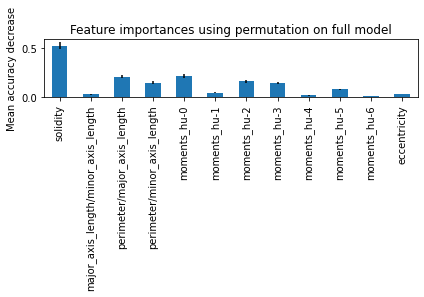

In [6]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [7]:
import pickle
if save:
    pickle.dump(best_model, open(f'../Models/{model_name}', 'wb'))